In [1]:
import pandas as pd

df = pd.read_csv("/Users/ian/Desktop/Study/data/ozone/ozone.csv")
df.head()

,Ozone,Solar.R,Wind,Temp,Result
0,41.0,190.0,7.4,67,0
1,36.0,118.0,8.0,72,0
2,12.0,149.0,12.6,74,0
3,18.0,313.0,11.5,62,0
4,NaN,NaN,14.3,56,0


<AxesSubplot:>

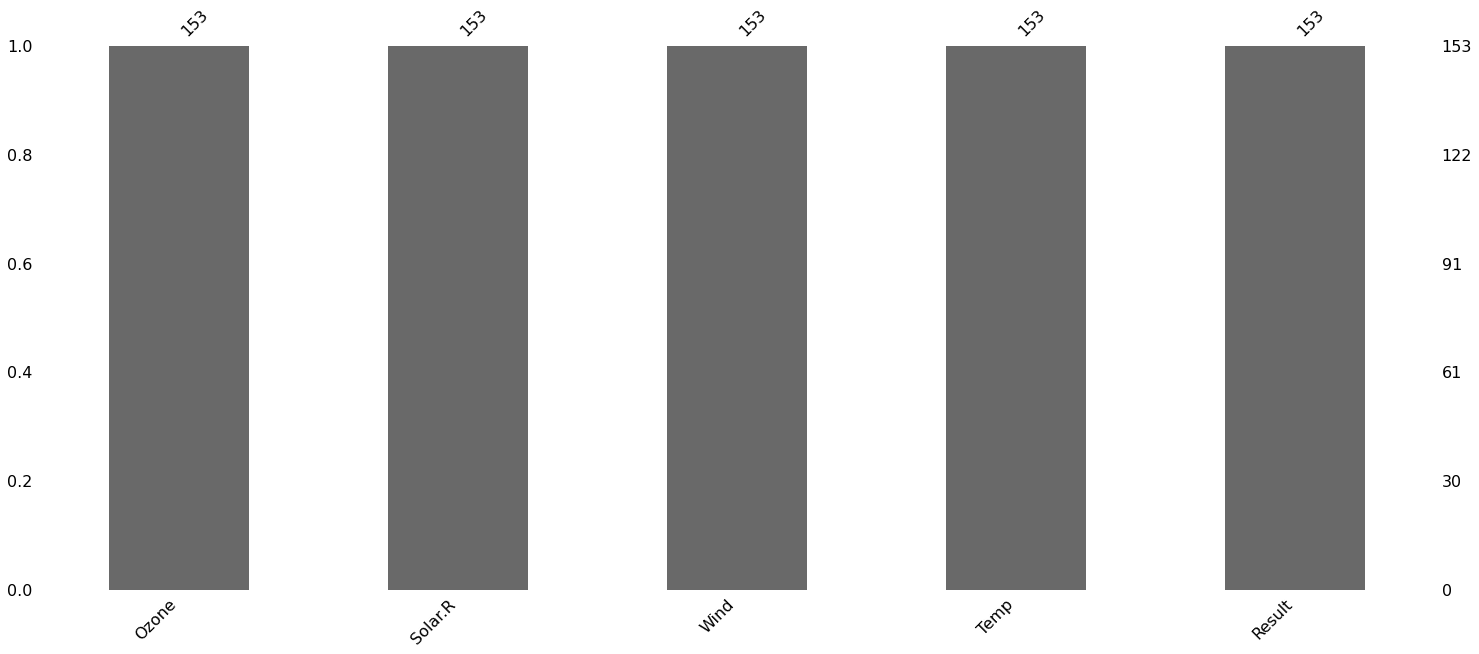

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import missingno as msno

imputer = SimpleImputer(strategy="mean")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
msno.bar(df)

In [5]:
df.to_csv("/Users/ian/Desktop/Study/data/ozone/ozone.csv", index=False)

In [11]:
df = pd.read_csv("/Users/ian/Desktop/Study/data/ozone/ozone.csv")
df["Result"] = df["Result"].astype(int)
df.head()

,Ozone,Solar.R,Wind,Temp,Result
0,41.00000,190.000000,7.4,67.0,0
1,36.00000,118.000000,8.0,72.0,0
2,12.00000,149.000000,12.6,74.0,0
3,18.00000,313.000000,11.5,62.0,0
4,42.12931,185.931507,14.3,56.0,0


In [12]:
df.groupby("Result").mean()

,Ozone,Solar.R,Wind,Temp
Result,,,,
0,23.339033,163.306984,11.244262,68.491803
1,54.588081,200.932549,9.104348,84.108696


In [13]:
df["Result"].value_counts()

1    92
0    61
Name: Result, dtype: int64

In [14]:
cols = ["Solar.R","Wind","Temp"]
X = df[cols]
y = df["Result"]

array([[<AxesSubplot:xlabel='Ozone', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Solar.R', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Wind', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Temp', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Result', ylabel='Ozone'>],
       [<AxesSubplot:xlabel='Ozone', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Solar.R', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Wind', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Temp', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Result', ylabel='Solar.R'>],
       [<AxesSubplot:xlabel='Ozone', ylabel='Wind'>,
        <AxesSubplot:xlabel='Solar.R', ylabel='Wind'>,
        <AxesSubplot:xlabel='Wind', ylabel='Wind'>,
        <AxesSubplot:xlabel='Temp', ylabel='Wind'>,
        <AxesSubplot:xlabel='Result', ylabel='Wind'>],
       [<AxesSubplot:xlabel='Ozone', ylabel='Temp'>,
        <AxesSubplot:xlabel='Solar.R', ylabel='Temp'>,
        <AxesSubplot:xlabel='Wind', ylabel='Temp'>,
        <AxesSubplo

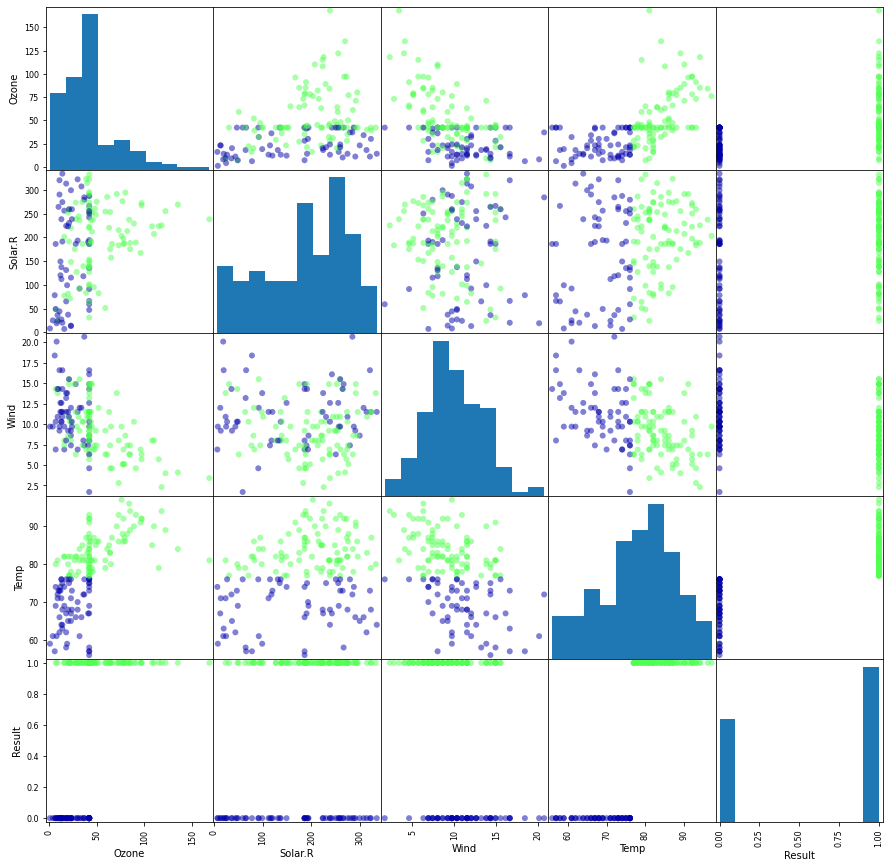

In [15]:
import mglearn
pd.plotting.scatter_matrix(df, c=y, figsize=(15,15), marker='o', cmap=mglearn.cm3)

In [16]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=["Result"])
df_samp = pd.concat([X_samp, y_samp], axis=1)

In [17]:
X = df_samp[cols]
y = df_samp["Result"]

In [18]:
df_samp["Result"].value_counts()

0    61
1    61
Name: Result, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [20]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=42)
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [21]:
import numpy as np

pred = model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(np.mean(pred == y_test))

0.8041237113402062
0.68
0.68


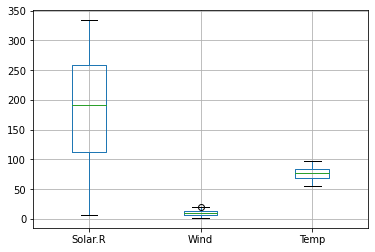

In [23]:
import matplotlib.pyplot as plt

X_train.boxplot()
plt.show()

In [24]:
# 정규화, 모든 변수의 값이 0에서 1 사이의 값을 갖도록

min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled = (X_test - min_on_training) / range_on_training

print("특성별 최소값\n{0}".format(X_train_scaled.min(axis=0)))
print("특성별 최대값\n{0}".format(X_train_scaled.max(axis=0)))

특성별 최소값
Solar.R    0.0
Wind       0.0
Temp       0.0
dtype: float64
특성별 최대값
Solar.R    1.0
Wind       1.0
Temp       1.0
dtype: float64


In [25]:
# 표준화, 평균 0, 표준편차 1

mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train
print(X_train_scaled.describe())
print(X_test_scaled.describe())

            Solar.R          Wind          Temp
count  9.700000e+01  9.700000e+01  9.700000e+01
mean   3.691205e-17 -1.344858e-16 -5.596898e-16
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -1.911134e+00 -2.322748e+00 -1.946801e+00
25%   -7.724890e-01 -7.929714e-01 -7.988394e-01
50%    8.420553e-02 -1.466416e-02  6.213195e-02
75%    8.216135e-01  6.026140e-01  7.317763e-01
max    1.634931e+00  2.776507e+00  1.975402e+00
         Solar.R       Wind       Temp
count  25.000000  25.000000  25.000000
mean    0.008611  -0.344237   0.169275
std     0.888720   0.762905   0.812821
min    -1.726782  -1.866499  -1.851138
25%    -0.523072  -0.792971  -0.320522
50%     0.029242  -0.470913  -0.033532
75%     0.702327   0.146365   0.827440
max     1.212006   1.380921   1.879738


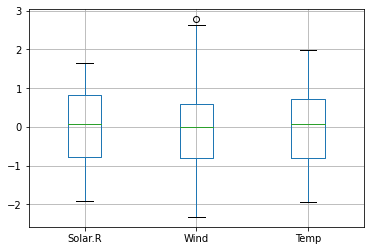

In [26]:
X_train_scaled.boxplot()
plt.show()

In [27]:
model = MLPClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))

0.979381443298969
0.96


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])
df_cm

,0,1
0,6,7
1,1,11


<AxesSubplot:>

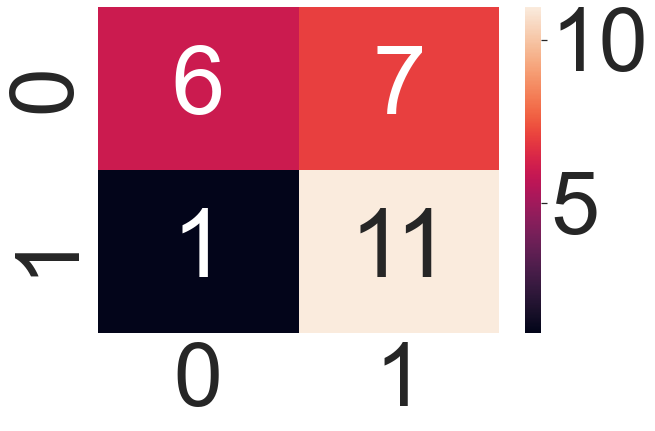

In [31]:
import seaborn as sns

sns.set(font_scale=8)
plt.figure(figsize=(9,6))
sns.heatmap(df_cm, annot=True)

In [ ]:
# 36페이지

In [ ]:
# 대용량 데이터 학습
# 서버 용량 증설
# 학습용 데이터를 적게 설정
# 분산 처리 시스템(hadoop, spark)

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:, :4]
y = iris.target

idx = np.arange(X.shape[0]) # 인덱스 0~149개 만들어짐
np.random.seed(0)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

params = {
    'hidden_layer_sizes': [(10,),(50,),(100,), # 은닉층 하나, 노드수 10개 50개 100개
    (10,10),(50,50),(100,100)], # 은닉층 둘
    'activation': ['tanh','relu'],
    'alpha': [0.0001,0.01]
}

model = MLPClassifier(random_state=0, max_iter=5000)
clf = GridSearchCV(model, param_grid=params, cv=3)
clf.fit(X,y)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=5000, random_state=0),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.01],
                         'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10),
                                                (50, 50), (100, 100)]})

In [4]:
print(clf.best_score_)
print(clf.best_estimator_)

0.9733333333333333
MLPClassifier(activation='tanh', hidden_layer_sizes=(50,), max_iter=5000,
              random_state=0)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 12/27부터 6주간 데이터 분석 프로젝트 실행
# 약품 판매량 데이터
# 뉴스 질병 관련 텍스트 마이닝
# 질병통계 찾기
# 프로젝트는 1월 말까지 완료해보는 것으로

In [ ]:
# generator
# 메모리는 절약할 수 있지만 실행시간이 더 오래 걸림

In [6]:
def make_numbers(n):
    while n < 6:
        yield n # 메모리를 저장하지 않고 호출한 곳으로 보냄. return이랑 비슷
        n+= 1

for i in make_numbers(0):
    print(i)

0
1
2
3
4
5


In [7]:
import sys

a = [i for i in range(100)]
print(sys.getsizeof(a))

b = [i for i in range(1000)]
print(sys.getsizeof(b))

904
9016


In [8]:
# generator expression : generator()를 좀 더 쉽게 사용할 수 있도록 제공되는 표현식
# [] 리스트 대신 ()를 사용

c = (i for i in range(100))
print(sys.getsizeof(c))

d = (i for i in range(1000))
print(sys.getsizeof(d))

112
112


In [14]:
import time

def func_sleep(x):
    print('1초 멈춤...')
    time.sleep(1)
    return x

items1 = [func_sleep(x) for x in range(5)]

1초 멈춤...
1초 멈춤...
1초 멈춤...
1초 멈춤...
1초 멈춤...


In [15]:
items2 = (func_sleep(y) for y in range(5))

In [16]:
%%time
for i in items1:
    print(i)

0
1
2
3
4
CPU times: user 1.4 ms, sys: 1.54 ms, total: 2.93 ms
Wall time: 2.38 ms


In [17]:
%%time
# %%time같은 magic 명령어는 첫 줄에 들어가야 함

# items1과 같은 리스트형은 실행하면 바로 리스트에 그 값을 저장해서 다시 불러올때는 빠르게 불러올 수 있음
# items2는 실행할 때 다시 함수를 실행해서 값을 리턴하기 때문에 시간이 더 걸림
for i in items2:
    print(i)

print('메모리 사용량1: ',sys.getsizeof(items1))
print('메모리 사용량2: ',sys.getsizeof(items2))

1초 멈춤...
0
1초 멈춤...
1
1초 멈춤...
2
1초 멈춤...
3
1초 멈춤...
4
메모리 사용량1:  120
메모리 사용량2:  112
CPU times: user 10 ms, sys: 4.24 ms, total: 14.3 ms
Wall time: 5.02 s


In [18]:
def batch(X1, y1, n):
    x_size = len(X1)
    for idx in range(0, x_size, n):
        yield X1[idx:min(idx + n, x_size)], y1[idx:min(idx + n, x_size)]

In [19]:
clf = MLPClassifier(activation='tanh', hidden_layer_sizes=(50,), max_iter=5000, random_state=0)

In [20]:
from sklearn.metrics import accuracy_score
clf.fit(X_train, y_train) # 일반적인 방식. 한꺼번에 처리함

pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.9666666666666667


In [22]:
clf2 = MLPClassifier(random_state=0)

points_tr = []
points_te = []
samp = batch(X_train, y_train, 10) # 10개씩 나눠서 학습을 시킴

for idx, (chunk_X, chunk_y) in enumerate(samp):
    print(idx)
    clf2.partial_fit(chunk_X, chunk_y, classes=[0,1,2]) # 배치batch 학습, 부분학습 함수 partial_fit()
    pred = clf2.predict(X_train)
    point = accuracy_score(y_train, pred)
    points_tr.append(point)
    print("학습용: ",point)
    pred = clf2.predict(X_test)
    point = accuracy_score(y_test, pred)
    print("검증용: ",point)
    points_te.append(point)

0
학습용:  0.48333333333333334
검증용:  0.5
1
학습용:  0.525
검증용:  0.5333333333333333
2
학습용:  0.6416666666666667
검증용:  0.6333333333333333
3
학습용:  0.725
검증용:  0.7
4
학습용:  0.7833333333333333
검증용:  0.7333333333333333
5
학습용:  0.825
검증용:  0.7666666666666667
6
학습용:  0.8416666666666667
검증용:  0.7666666666666667
7
학습용:  0.8333333333333334
검증용:  0.8
8
학습용:  0.85
검증용:  0.8
9
학습용:  0.8583333333333333
검증용:  0.8
10
학습용:  0.8583333333333333
검증용:  0.8
11
학습용:  0.8583333333333333
검증용:  0.8


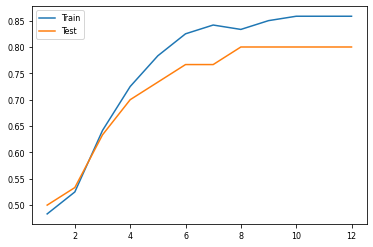

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["font.size"]=8
plt.plot(range(1,13),points_tr,label="Train")
plt.plot(range(1,13),points_te,label="Test")
plt.legend()
plt.show()